In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import pandas as pd
import math

import wave
import librosa
from pydub import AudioSegment
from pydub.playback import play

from scipy.io import wavfile

D:\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
D:\Anaconda3\lib\site-packages\pydub\utils.py:179: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


## fetch data

In [2]:
DATA_FOLDER = "audibles"
CURRENT_DIR = os.getcwd()
print(f"current directory: {CURRENT_DIR}")

AUDIBLES_DIR = os.path.join(CURRENT_DIR, DATA_FOLDER)
print(AUDIBLES_DIR)

current directory: C:\Users\xianl_pmrkzzf\SpeechRecognition\Speaker-Identification
C:\Users\xianl_pmrkzzf\SpeechRecognition\Speaker-Identification\audibles


In [3]:
def fetch_data(folder_path): 
    audios = []
    for audio in os.listdir(folder_path):
        if audio.endswith('.wav'):
            audios.append(os.path.join(folder_path, audio))
    return audios

audibles = fetch_data(DATA_FOLDER)
print(audibles)

['audibles\\Daniel.wav', 'audibles\\Dorothy.wav', 'audibles\\Jakub.wav', 'audibles\\Lei.wav', 'audibles\\LudvigPartybox.wav', 'audibles\\Margarita.wav', 'audibles\\ReneElevator.wav', 'audibles\\Richard.wav', 'audibles\\Robert.wav']


## check data attributes

In [4]:
## get 1 audio stats

def get_audio_stats(audio):
    wav = wave.open(audio)
    print(f"{audio}")
    print(f"channels: {wav.getnchannels()}")
    print(f"sample rate: {wav.getframerate()}")
    print(f"frames: {wav.getnframes()}")
    print(f"sample width: {wav.getsampwidth()}")
    print(f"duration: {wav.getnframes()/wav.getframerate()}\n")

get_audio_stats(audibles[0])

audibles\Daniel.wav
channels: 2
sample rate: 44100
frames: 4277846
sample width: 2
duration: 97.00331065759637



In [5]:
## pydub AudioSegment
## get a list of audios stats
## we can see data have different sample rate
## the lengths of audios varies quite a bit

def get_audios_stats(audios):
    print(f"found {len(audios)} files.\n")
    for audio in audios:
        signal = AudioSegment.from_file(audio)  
        channels = signal.channels
        sample_rate = signal.frame_rate
        sample_width = signal.sample_width
        length_ms = len(signal)
        frame_width = signal.frame_width
        print(f'{audio}\nchannels: {channels}, sample_rate: {sample_rate}, \
        \nsample_width: {sample_width}, length: {length_ms}, frame_width: {frame_width}\n')
        
get_audios_stats(audibles)        

found 9 files.

audibles\Daniel.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 97003, frame_width: 4

audibles\Dorothy.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 14320, frame_width: 4

audibles\Jakub.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 77530, frame_width: 4

audibles\Lei.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 1347, frame_width: 4

audibles\LudvigPartybox.wav
channels: 2, sample_rate: 48000,         
sample_width: 2, length: 59307, frame_width: 4

audibles\Margarita.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 7726, frame_width: 4

audibles\ReneElevator.wav
channels: 2, sample_rate: 48000,         
sample_width: 2, length: 11757, frame_width: 4

audibles\Richard.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 101829, frame_width: 4

audibles\Robert.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 907

## visualize some data for observing

file: audibles\Dorothy.wav
(631495, 2)


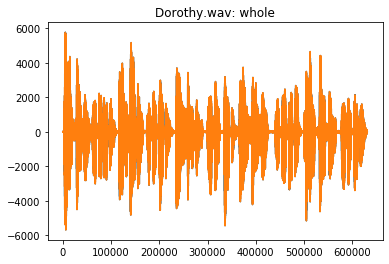

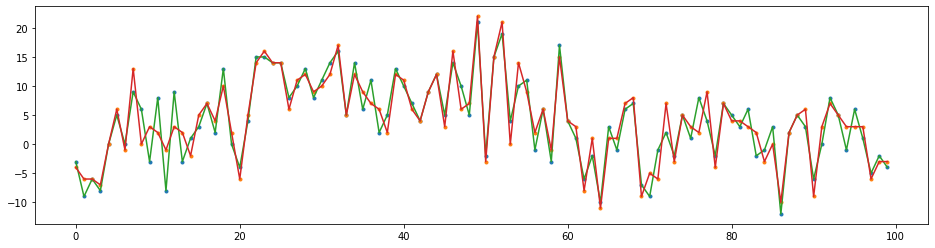

In [6]:
## plot some audios to get some idea of what they look like
## we can see here two channels follow almost the same path
## we conclude here to monolize the audios will not lead to much data loss

def plot_audio_frames(file):
    print(f"file: {file}")
    rate, data = wavfile.read(file)
    print(data.shape)
    plt.title(f"{os.path.split(file)[1]}: whole")
    plt.plot(data, '-')
    
    #plt.title("{file}: {frame} frames")

    frame = 100
    plt.figure(figsize=(16, 4))
    plt.plot(data[:frame], '.'); 
    plt.plot(data[:frame], '-');

plot_audio_frames(audibles[1])

## transform audio and export

In [7]:
def transform_audio(audio_path):
    export_folder = 'audibles_re'
    audio_name = os.path.split(audio_path)[1]
    out_fname = os.path.join(export_folder, audio_name)
    audio = AudioSegment.from_file(audio_path)
    if audio.channels != 1:
        audio = audio.set_channels(1)
    if audio.frame_rate != 44100:
        audio = audio.set_frame_rate(44100) 
    audio.export(out_f=out_fname, format='wav')

for audio in audibles:
    transform_audio(audio)

In [8]:
audibles_re = fetch_data('audibles_re')
#print(audibles_re)
get_audios_stats(audibles_re)   

found 9 files.

audibles_re\Daniel.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 97003, frame_width: 2

audibles_re\Dorothy.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 14320, frame_width: 2

audibles_re\Jakub.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 77530, frame_width: 2

audibles_re\Lei.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 1347, frame_width: 2

audibles_re\LudvigPartybox.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 59307, frame_width: 2

audibles_re\Margarita.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 7726, frame_width: 2

audibles_re\ReneElevator.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 11757, frame_width: 2

audibles_re\Richard.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 101829, frame_width: 2

audibles_re\Robert.wav
channels: 1, sample_rate: 44100,         
s

file: audibles_re\Dorothy.wav
(631495,)


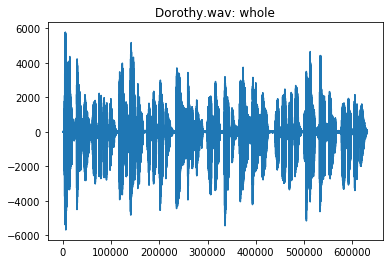

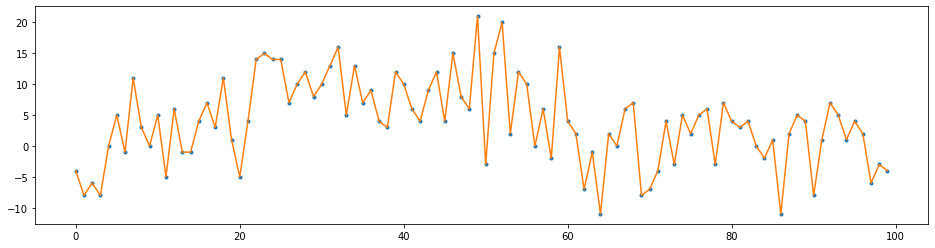

In [9]:
## here we can see data now has the consistent sample rate 
## and have same channel

plot_audio_frames(audibles_re[1])

In [10]:
## try plot the sample rate in the same plot

## trim audios to smaller segments and export 

In [13]:
def trim_audio(audio_path):
    folder = 'segments'
    signal = AudioSegment.from_file(audio_path)
    length = len(signal)
    segm_len = 200
    segm_qty = math.floor(length/segm_len)
    for i in range(segm_qty):
        audio_name = f"{i}_{os.path.split(audio_path)[1]}"
        export_path = os.path.join(folder, audio_name)
        signal_segm = signal[200*i : 200*(i+1)]
        signal_segm.export(out_f=export_path, format='wav')
        print(export_path)
        
for audio in audibles_re:
    trim_audio(audio)
       
#        audibles_1s.append(audio_seg)
#        audio_name = os.path.split(ele)[1]
#        export_fname = os.path.join(EXPORT_FOLDER, audio_name)
#        print(export_fname)
#        audio_seg.export(out_f=export_fname, format='wav')
#    return audibles_1s

segments\0_Daniel.wav
segments\1_Daniel.wav
segments\2_Daniel.wav
segments\3_Daniel.wav
segments\4_Daniel.wav
segments\5_Daniel.wav
segments\6_Daniel.wav
segments\7_Daniel.wav
segments\8_Daniel.wav
segments\9_Daniel.wav
segments\10_Daniel.wav
segments\11_Daniel.wav
segments\12_Daniel.wav
segments\13_Daniel.wav
segments\14_Daniel.wav
segments\15_Daniel.wav
segments\16_Daniel.wav
segments\17_Daniel.wav
segments\18_Daniel.wav
segments\19_Daniel.wav
segments\20_Daniel.wav
segments\21_Daniel.wav
segments\22_Daniel.wav
segments\23_Daniel.wav
segments\24_Daniel.wav
segments\25_Daniel.wav
segments\26_Daniel.wav
segments\27_Daniel.wav
segments\28_Daniel.wav
segments\29_Daniel.wav
segments\30_Daniel.wav
segments\31_Daniel.wav
segments\32_Daniel.wav
segments\33_Daniel.wav
segments\34_Daniel.wav
segments\35_Daniel.wav
segments\36_Daniel.wav
segments\37_Daniel.wav
segments\38_Daniel.wav
segments\39_Daniel.wav
segments\40_Daniel.wav
segments\41_Daniel.wav
segments\42_Daniel.wav
segments\43_Daniel.wa

segments\58_Jakub.wav
segments\59_Jakub.wav
segments\60_Jakub.wav
segments\61_Jakub.wav
segments\62_Jakub.wav
segments\63_Jakub.wav
segments\64_Jakub.wav
segments\65_Jakub.wav
segments\66_Jakub.wav
segments\67_Jakub.wav
segments\68_Jakub.wav
segments\69_Jakub.wav
segments\70_Jakub.wav
segments\71_Jakub.wav
segments\72_Jakub.wav
segments\73_Jakub.wav
segments\74_Jakub.wav
segments\75_Jakub.wav
segments\76_Jakub.wav
segments\77_Jakub.wav
segments\78_Jakub.wav
segments\79_Jakub.wav
segments\80_Jakub.wav
segments\81_Jakub.wav
segments\82_Jakub.wav
segments\83_Jakub.wav
segments\84_Jakub.wav
segments\85_Jakub.wav
segments\86_Jakub.wav
segments\87_Jakub.wav
segments\88_Jakub.wav
segments\89_Jakub.wav
segments\90_Jakub.wav
segments\91_Jakub.wav
segments\92_Jakub.wav
segments\93_Jakub.wav
segments\94_Jakub.wav
segments\95_Jakub.wav
segments\96_Jakub.wav
segments\97_Jakub.wav
segments\98_Jakub.wav
segments\99_Jakub.wav
segments\100_Jakub.wav
segments\101_Jakub.wav
segments\102_Jakub.wav
segment

segments\256_LudvigPartybox.wav
segments\257_LudvigPartybox.wav
segments\258_LudvigPartybox.wav
segments\259_LudvigPartybox.wav
segments\260_LudvigPartybox.wav
segments\261_LudvigPartybox.wav
segments\262_LudvigPartybox.wav
segments\263_LudvigPartybox.wav
segments\264_LudvigPartybox.wav
segments\265_LudvigPartybox.wav
segments\266_LudvigPartybox.wav
segments\267_LudvigPartybox.wav
segments\268_LudvigPartybox.wav
segments\269_LudvigPartybox.wav
segments\270_LudvigPartybox.wav
segments\271_LudvigPartybox.wav
segments\272_LudvigPartybox.wav
segments\273_LudvigPartybox.wav
segments\274_LudvigPartybox.wav
segments\275_LudvigPartybox.wav
segments\276_LudvigPartybox.wav
segments\277_LudvigPartybox.wav
segments\278_LudvigPartybox.wav
segments\279_LudvigPartybox.wav
segments\280_LudvigPartybox.wav
segments\281_LudvigPartybox.wav
segments\282_LudvigPartybox.wav
segments\283_LudvigPartybox.wav
segments\284_LudvigPartybox.wav
segments\285_LudvigPartybox.wav
segments\286_LudvigPartybox.wav
segments

segments\432_Richard.wav
segments\433_Richard.wav
segments\434_Richard.wav
segments\435_Richard.wav
segments\436_Richard.wav
segments\437_Richard.wav
segments\438_Richard.wav
segments\439_Richard.wav
segments\440_Richard.wav
segments\441_Richard.wav
segments\442_Richard.wav
segments\443_Richard.wav
segments\444_Richard.wav
segments\445_Richard.wav
segments\446_Richard.wav
segments\447_Richard.wav
segments\448_Richard.wav
segments\449_Richard.wav
segments\450_Richard.wav
segments\451_Richard.wav
segments\452_Richard.wav
segments\453_Richard.wav
segments\454_Richard.wav
segments\455_Richard.wav
segments\456_Richard.wav
segments\457_Richard.wav
segments\458_Richard.wav
segments\459_Richard.wav
segments\460_Richard.wav
segments\461_Richard.wav
segments\462_Richard.wav
segments\463_Richard.wav
segments\464_Richard.wav
segments\465_Richard.wav
segments\466_Richard.wav
segments\467_Richard.wav
segments\468_Richard.wav
segments\469_Richard.wav
segments\470_Richard.wav
segments\471_Richard.wav


In [36]:
x = 97003/200
print(x)
print(math.floor(x))

485.015
485


## pre-processing data by using Librosa

In [14]:
## change the sample rate and channels of all audios to the same 
## add label of names
## chunk each audio to 0.01s
## each 0.01s is an array
## each audio is a dataframe

def transform_audios(audios):
    audios_df = []
    for audio in audios:
        samples, sample_rate = librosa.load(audio, sr=44100, mono=True, duration=1.0, dtype=np.float32)
        print(audio)
        print(samples.shape)
        samples_2d = samples.reshape(100, 441)
        name = os.path.split(audio)[1].split('.')[0]
        print(name)
        label = np.full((100,), name)
        samples_df = pd.DataFrame(samples_2d)
        samples_df[len(samples_df.columns)] = label
        audios_df.append(samples_df)
    return audios_df

In [15]:
## transform audios so they are consistent


In [16]:

## this part is to help another notebook
url = 'C:/Users/xianl_pmrkzzf/Desktop/Kaggle-audio-tagging/audio_test/'
test = fetch_voice_data(url, 'audio_test')
len(test)


import csv

def save_csv(file_name, files):
    with open(file_name, mode='w') as csv_file:
        header = ['fname', 'label']
        csv_writer = csv.DictWriter(csv_file, fieldnames=header)

        csv_writer.writeheader()
        if len(files) > 0:
            for ele in files:
                csv_writer.writerow({'fname': ele, 'label': ele.split('.')[0]})
        else:
            print("nothing to write to csv.")

#save_file('sample_submission.csv', 'Laughter Hi-Hat Flute', test)
#save_csv('audibles_csv', audibles)

NameError: name 'fetch_voice_data' is not defined

In [ ]:
#audibles_path = os.path.join(FOLDER_PATH)
#name = os.path.split(audio)[1].split('.')[0]
#print(audibles_path)

audios_df = transform_audios(audibles_1s)
audios_df[2].describe()

In [ ]:
audios_df[1].info()

## experiment area

In [ ]:
x = np.array([])
zz = np.arange(15).reshape(3, 5)
print(zz)
df = pd.DataFrame(zz)
df


In [ ]:
df.head()
z = np.arange(3)
z
df[len(df.columns)] = z
df

In [ ]:
print(type(audibles_1s[2]))

audio_1s = os.path.join(EXPORT_FOLDER, 'Daniel.wav')
plot_audio_frames(audio_1s)


In [ ]:

import seaborn as sns

audibles_csv = pd.read_csv('audibles_csv')
audibles_csv['nframes'] = audibles_csv['fname'].apply(lambda f: wave.open('audibles/' + f).getnframes())

_, ax = plt.subplots(figsize=(16, 4))
sns.violinplot(ax=ax, x="label", y="nframes", data=audibles_csv)
plt.xticks(rotation=90)
plt.title('Distribution of audio frames, per label', fontsize=16)
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
audibles_csv.nframes.hist(bins=100, ax=axes[0])
#test.nframes.hist(bins=100, ax=axes[1])
plt.suptitle('Frame Length Distribution in Train and Test', ha='center', fontsize='large');

In [ ]:
au = audibles_1s[0].set_sample_width(1)
play(au)


In [ ]:
audibles_1s[0].channels

In [ ]:
## using pydub

def get_file_stats(file_name):
    audio_segment = AudioSegment.from_file(file_name)
    
    channels = audio_segment.channels
    sample_width = audio_segment.sample_width
    sample_rate = audio_segment.frame_rate
    frame_width = audio_segment.frame_width
    length_ms = len(audio_segment)
    
    audio_stats = [file_name, channels, sample_width, sample_rate,
                           frame_width, length_ms]
    
    print(file_name)
    print(f"Channels: {audio_segment.channels}")
    print(f"Sample width: {audio_segment.sample_width}")
    print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
    print(f"Frame width: {audio_segment.frame_width}")
    print(f"Length (ms): {len(audio_segment)}")

    return audio_stats

In [ ]:
audio_stats = get_file_stats(audios[0])
audio_stats

In [ ]:
def process_audio(audios):
    for audio in audios:
        print(audio)
        audio_c = AudioSegment.from_file(audio)
        sample = audio_c[500:1500]
        play(sample)
        sleep(1)
#        audio_stats = get_file_stats(audio_c)

In [ ]:
process_audio(audios)


## enumerate example

In [ ]:
labels = ["a", "b", "c"]

In [ ]:
label_x = {label: i for i, label in enumerate(labels)}

In [ ]:
label_x

## using Librosa to calculate mfcc

In [ ]:
SAMPLE_RATE = 44100
fname = "segments/good-afternoon.wav"
wav, _ = librosa.core.load(fname, sr=SAMPLE_RATE)
#wav = wav[:2*48000]

In [ ]:
mfcc = librosa.feature.mfcc(wav, sr=SAMPLE_RATE, n_mfcc=40)
mfcc.shape

In [ ]:
flatness = librosa.feature.spectral_flatness(wav)
flatness.shape

In [ ]:
plt.imshow(mfcc, cmap='hot', interpolation='nearest')

In [ ]:
def get_mfcc(file_name, sample_rate):
    SAMPLE_RATE = 48000
    wav, _ = librosa.core.load(file_name, sr=sample_rate)
## don't know if this should be include and why
    #wav = wav[:2*48000]
    mfcc = librosa.feature.mfcc(wav, sr=SAMPLE_RATE, n_mfcc=40)
    print(f"'{file_name}' has mfcc {mfcc.shape}")
    return mfcc

In [ ]:
get_mfcc(fname, SAMPLE_RATE)

In [ ]:
import tensorflow as tf

In [ ]:
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y +2

In [ ]:
with tf.compat.v1.Session() as sess:
    sess.run(x.initializer)
    sess.run(y.initializer)
    result = sess.run(f)
    print(result)

In [ ]:
print(tf.__version__)